# Using Statistical Data Analysis to assist Telecom company Megaline with analyzing consumer behavior

# Which one is a better plan?

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze the clients' behavior and determine which prepaid plan brings in more revenue.

The purpose of this Project is to use the data on 500 Megaline Clients to analyze their behaviors and ultimately determine which of two prepaid plans (Surf or Ultimate) brings in more revenue. I will do that by analyzing and cleaning up the data, testing hypotheses and drawing an overall conclusion. This study can help the company in areas such as marketing and budgeting.

## Initialization

In [1]:
# Loading all the libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from math import factorial
from scipy import stats as st
import random
import seaborn as sns

## Load data

In [2]:
# Load the data files into different DataFrames
megaline_calls = pd.read_csv('/datasets/megaline_calls.csv')

In [3]:
megaline_internet = pd.read_csv('/datasets/megaline_internet.csv')

In [4]:
megaline_messages = pd.read_csv('/datasets/megaline_messages.csv')

In [5]:
megaline_plans = pd.read_csv('/datasets/megaline_plans.csv')

In [6]:
megaline_users = pd.read_csv('/datasets/megaline_users.csv')

## Prepare the data

In [7]:
megaline_calls.info()
megaline_calls.describe()
megaline_calls.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [8]:
megaline_calls.isna().sum()

id           0
user_id      0
call_date    0
duration     0
dtype: int64

In [9]:
megaline_calls.duplicated().sum()

0

In [10]:
megaline_internet.info()
megaline_internet.describe()
megaline_internet.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [11]:
megaline_internet.isna().sum()

id              0
user_id         0
session_date    0
mb_used         0
dtype: int64

In [12]:
megaline_internet.duplicated().sum()

0

In [13]:
megaline_messages.info()
megaline_messages.describe()
megaline_messages.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [14]:
megaline_messages.isna().sum()

id              0
user_id         0
message_date    0
dtype: int64

In [15]:
megaline_messages.duplicated().sum()

0

In [16]:
megaline_plans.info()
megaline_plans.describe()
megaline_plans.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [17]:
megaline_plans.isna().sum()

messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64

In [18]:
megaline_plans.duplicated().sum()

0

In [19]:
megaline_users.info()
megaline_users.describe()
megaline_users.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [20]:
megaline_users.isna().sum()

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

In [21]:
megaline_users.duplicated().sum()

0

## Plans

In [22]:
# Print the general/summary information about the plans' DataFrame

megaline_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [23]:
# Print a sample of data for plans

megaline_plans.sample()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf


Upon observation I do not see any obvious things that stick out. There are no duplicates and there are no missing values. All of the titles of the table are consistent in their formatting like all lowercase. All of the different columns are categorized the right type, so none of those need to be converted. 

## Fix data

I don't see any obvious issues that should be fixed in my opinion. 

## Enrich data

In [24]:
megaline_plans['cost_per_extra_minute'] = megaline_plans['usd_per_minute'] * 60  
megaline_plans['cost_per_extra_gb'] = megaline_plans['usd_per_gb'] * 1024  
megaline_plans['is_premium'] = megaline_plans['usd_monthly_pay'] > 50  

megaline_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,cost_per_extra_minute,cost_per_extra_gb,is_premium
0,50,15360,500,20,10,0.03,0.03,surf,1.8,10240,False
1,1000,30720,3000,70,7,0.01,0.01,ultimate,0.6,7168,True


## Users

In [25]:
# Print the general/summary information about the users' DataFrame

megaline_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [26]:
# Print a sample of data for users

megaline_users.sample(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
223,1223,Patience,Wilson,37,"Phoenix-Mesa-Chandler, AZ MSA",2018-07-05,surf,NaN
64,1064,Gerardo,Ashley,46,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-06-03,surf,NaN
102,1102,Marquitta,Walton,30,"Riverside-San Bernardino-Ontario, CA MSA",2018-02-20,ultimate,NaN
212,1212,Alfredo,Pruitt,36,"Austin-Round Rock-Georgetown, TX MSA",2018-07-27,surf,NaN
148,1148,Dwana,Moore,67,"Columbia, SC MSA",2018-11-04,surf,NaN
143,1143,Lorina,Stevens,69,"Cincinnati, OH-KY-IN MSA",2018-10-26,surf,NaN
15,1015,Beata,Carpenter,26,"Pittsburgh, PA MSA",2018-12-05,surf,NaN
24,1024,Yuki,Tyson,74,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-08-21,surf,NaN
378,1378,Mckinley,Clayton,22,"Denver-Aurora-Lakewood, CO MSA",2018-12-17,surf,NaN
215,1215,Adelle,Knapp,70,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-07-01,surf,NaN


Upon observation I only see a couple of things that stick out to me. There are no duplicates. All of the titles of the table are consistent in their formatting like all lowercase. All of the different columns are categorized the right type, so none of those need to be converted. The two things that I can see needing to be fixed or just dealt with to make the data cleaner would be the 466 missing values in the churn_date coulumn and the extra information in the city column that says 'MSA' all the way down, theres no need for that extra information.

### Fix Data

In [27]:
megaline_users['churn_date'] = megaline_users['churn_date'].fillna(value='No info')
megaline_users.isna().sum()
megaline_users.head(15)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,No info
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,No info
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,No info
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,No info
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,No info
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,No info
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,No info
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,No info
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,No info


### Enrich Data

In [28]:
megaline_users['city'] = megaline_users['city'].str.replace(' MSA', '') 
megaline_users.head(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA",2018-12-24,ultimate,No info
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA",2018-08-13,surf,No info
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV",2018-10-21,surf,No info
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK",2018-01-28,surf,No info
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA",2018-05-23,surf,No info
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX",2018-11-29,surf,No info
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI",2018-07-11,surf,No info
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL",2018-08-03,ultimate,No info
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA",2018-04-22,surf,No info


## Calls

In [29]:
# Print the general/summary information about the calls' DataFrame

megaline_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [30]:
# Print a sample of data for calls

megaline_calls.sample(10)

,id,user_id,call_date,duration
93438,1334_806,1334,2018-04-09,11.21
16303,1064_161,1064,2018-12-26,4.46
55291,1198_35,1198,2018-10-14,1.14
73313,1261_60,1261,2018-06-28,14.28
7996,1038_107,1038,2018-10-27,13.49
114244,1400_594,1400,2018-05-09,3.44
82618,1299_276,1299,2018-04-19,5.79
101166,1361_268,1361,2018-11-18,13.22
23765,1088_238,1088,2018-11-15,3.21
129047,1465_242,1465,2018-10-31,6.11


Upon observation I do not see any obvious things that stick out. There are no duplicates and there are no missing values. All of the titles of the table are consistent in their formatting like all lowercase. All of the different columns are categorized the right type, so none of those need to be converted. **The duration times needed to be rounded up using np.ceil()**

### Fix data

In [31]:
megaline_calls['duration'] = np.ceil(megaline_calls['duration'])
megaline_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [32]:
megaline_calls['call_date'] = pd.to_datetime(megaline_calls['call_date'])

I do not see anything specific that needs to be fixed, but I did make sure that specific column data was a datetime object so I could use the code below.

### Enrich data

In [33]:
megaline_calls['total_calls_per_user'] = megaline_calls.groupby('user_id')['duration'].transform('count')
megaline_calls['avg_duration'] = megaline_calls.groupby('user_id')['duration'].transform('mean')
megaline_calls['call_weekday'] = megaline_calls['call_date'].dt.day_name()
megaline_calls['call_month'] = megaline_calls['call_date'].dt.month
megaline_calls.head(10)

,id,user_id,call_date,duration,total_calls_per_user,avg_duration,call_weekday,call_month
0,1000_93,1000,2018-12-27,9.0,16,7.75,Thursday,12
1,1000_145,1000,2018-12-27,14.0,16,7.75,Thursday,12
2,1000_247,1000,2018-12-27,15.0,16,7.75,Thursday,12
3,1000_309,1000,2018-12-28,6.0,16,7.75,Friday,12
4,1000_380,1000,2018-12-30,5.0,16,7.75,Sunday,12
5,1000_388,1000,2018-12-31,3.0,16,7.75,Monday,12
6,1000_510,1000,2018-12-27,6.0,16,7.75,Thursday,12
7,1000_521,1000,2018-12-28,15.0,16,7.75,Friday,12
8,1000_530,1000,2018-12-28,6.0,16,7.75,Friday,12
9,1000_544,1000,2018-12-26,5.0,16,7.75,Wednesday,12


## Messages

In [34]:
# Print the general/summary information about the messages' DataFrame

megaline_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [35]:
# Print a sample of data for messages

megaline_messages.sample(10)

,id,user_id,message_date
46070,1313_266,1313,2018-06-23
9883,1075_138,1075,2018-10-03
19870,1126_764,1126,2018-10-23
38494,1253_28,1253,2018-10-07
47672,1324_389,1324,2018-08-21
3977,1039_75,1039,2018-11-03
3417,1036_252,1036,2018-09-30
70884,1460_449,1460,2018-10-26
59289,1374_463,1374,2018-10-19
60828,1382_594,1382,2018-12-29


Upon observation I do not see any obvious things that stick out. There are no duplicates and there are no missing values. All of the titles of the table are consistent in their formatting like being all in lowercase. All of the different columns are categorized the right type, so none of those need to be converted.

### Fix data

In [36]:
megaline_messages['message_date'] = pd.to_datetime(megaline_messages['message_date'])

Don't see anything specific that needs to be fixed, but I did make sure that specific column data was a datetime object so I could use the code below.

In [37]:
megaline_messages['year'] = megaline_messages['message_date'].dt.year
megaline_messages['month'] = megaline_messages['message_date'].dt.month
megaline_messages['day'] = megaline_messages['message_date'].dt.day
megaline_messages['is_weekend'] = megaline_messages['message_date'].dt.weekday >= 5
megaline_messages.head(10)


,id,user_id,message_date,year,month,day,is_weekend
0,1000_125,1000,2018-12-27,2018,12,27,False
1,1000_160,1000,2018-12-31,2018,12,31,False
2,1000_223,1000,2018-12-31,2018,12,31,False
3,1000_251,1000,2018-12-27,2018,12,27,False
4,1000_255,1000,2018-12-26,2018,12,26,False
5,1000_346,1000,2018-12-29,2018,12,29,True
6,1000_386,1000,2018-12-30,2018,12,30,True
7,1000_413,1000,2018-12-31,2018,12,31,False
8,1000_502,1000,2018-12-27,2018,12,27,False
9,1000_525,1000,2018-12-28,2018,12,28,False


### Enrich data

## Internet

In [38]:
# Print the general/summary information about the internet DataFrame

megaline_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [39]:
# Print a sample of data for the internet traffic

megaline_internet.sample(10)

,id,user_id,session_date,mb_used
100371,1475_164,1475,2018-12-02,251.60
49643,1222_142,1222,2018-08-27,281.04
3671,1022_82,1022,2018-10-14,0.00
22424,1101_316,1101,2018-08-06,120.58
35926,1162_45,1162,2018-11-24,634.93
99377,1468_113,1468,2018-10-25,171.93
44468,1196_481,1196,2018-10-27,432.52
9215,1048_1,1048,2018-10-26,278.91
37784,1171_155,1171,2018-08-01,205.79
53618,1242_29,1242,2018-10-26,1013.42


Upon observation I do not see any obvious things that stick out. There are no duplicates and there are no missing values. All of the titles of the table are consistent in their formatting like being all in lowercase. All of the different columns are categorized the right type, so none of those need to be converted.

### Fix data

In [40]:
megaline_internet['session_date'] = pd.to_datetime(megaline_internet['session_date'])

Made sure specific column data was a datetime object so I could do the below code.

### Enrich data

In [41]:
megaline_internet['day_of_week'] = megaline_internet['session_date'].dt.day_name()
megaline_internet['month'] = megaline_internet['session_date'].dt.month
megaline_internet['is_weekend'] = megaline_internet['day_of_week'].isin(['Saturday', 'Sunday'])
megaline_internet['usage_category']=pd.cut(megaline_internet['mb_used'], bins=[0, 500, 1000, float('inf')], labels=['Low', 'Medium', 'High'])

megaline_internet.head(10)

,id,user_id,session_date,mb_used,day_of_week,month,is_weekend,usage_category
0,1000_13,1000,2018-12-29,89.86,Saturday,12,True,Low
1,1000_204,1000,2018-12-31,0.00,Monday,12,False,NaN
2,1000_379,1000,2018-12-28,660.40,Friday,12,False,Medium
3,1000_413,1000,2018-12-26,270.99,Wednesday,12,False,Low
4,1000_442,1000,2018-12-27,880.22,Thursday,12,False,Medium
5,1001_0,1001,2018-08-24,284.68,Friday,8,False,Low
6,1001_3,1001,2018-12-09,656.04,Sunday,12,True,Medium
7,1001_4,1001,2018-11-04,16.97,Sunday,11,True,Low
8,1001_10,1001,2018-11-27,135.18,Tuesday,11,False,Low
9,1001_15,1001,2018-12-13,761.92,Thursday,12,False,Medium


## Study plan conditions

In [42]:
# Print out the plan conditions and make sure they are clear for you

megaline_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,cost_per_extra_minute,cost_per_extra_gb,is_premium
0,50,15360,500,20,10,0.03,0.03,surf,1.8,10240,False
1,1000,30720,3000,70,7,0.01,0.01,ultimate,0.6,7168,True


## Aggregate data per user

[Now, as the data is clean, aggregate data per user per period in order to have just one record per user per period. It should ease the further analysis a lot.]

In [43]:
# Calculate the number of calls made by each user per month. Save the result.

megaline_calls['month'] = megaline_calls['call_date'].dt.month
calls_per_month = megaline_calls.groupby(['user_id','month'])['call_date'].count()

print(calls_per_month)


user_id  month
1000     12       16
1001     8        27
         9        49
         10       65
         11       64
                  ..
1498     12       39
1499     9        41
         10       53
         11       45
         12       65
Name: call_date, Length: 2258, dtype: int64


In [44]:
# Calculate the amount of minutes spent by each user per month. Save the result.

minutes_per_month = megaline_calls.groupby(['user_id', 'month'])['duration'].sum()
print(minutes_per_month)


user_id  month
1000     12       124.0
1001     8        182.0
         9        315.0
         10       393.0
         11       426.0
                  ...  
1498     12       339.0
1499     9        346.0
         10       385.0
         11       308.0
         12       496.0
Name: duration, Length: 2258, dtype: float64


In [45]:
# Calculate the number of messages sent by each user per month. Save the result.

megaline_messages['month'] = megaline_messages['message_date'].dt.month
messages_per_month = megaline_messages.groupby(['user_id', 'month'])['message_date'].count()
print(messages_per_month)


user_id  month
1000     12       11
1001     8        30
         9        44
         10       53
         11       36
                  ..
1496     9        21
         10       18
         11       13
         12       11
1497     12       50
Name: message_date, Length: 1806, dtype: int64


In [46]:
# Calculate the volume of internet traffic used by each user per month. Save the result.

megaline_internet['month'] = megaline_internet['session_date'].dt.month
monthly_internet_usage = megaline_internet.groupby(['user_id', 'month'])['mb_used'].sum()
print(monthly_internet_usage)


user_id  month
1000     12        1901.47
1001     8         6919.15
         9        13314.82
         10       22330.49
         11       18504.30
                    ...   
1498     12       23137.69
1499     9        12984.76
         10       19492.43
         11       16813.83
         12       22059.21
Name: mb_used, Length: 2277, dtype: float64


In [47]:
# Merge the data for calls, minutes, messages, internet based on user_id and month
calls_per_month = calls_per_month.reset_index()
minutes_per_month = minutes_per_month.reset_index()
messages_per_month = messages_per_month.reset_index()
monthly_internet_usage = monthly_internet_usage.reset_index()

merged_data = pd.merge(calls_per_month, minutes_per_month, on=['user_id', 'month'], how='outer')
merged_data = pd.merge(merged_data, messages_per_month, on=['user_id', 'month'], how='outer')
merged_data = pd.merge(merged_data, monthly_internet_usage, on=['user_id', 'month'], how='outer')
merged_data.rename(columns={'call_date': 'calls_count', 'message_date': 'messages_count'}, inplace=True)

print(merged_data.head())



   user_id  month  calls_count  duration  messages_count   mb_used
0     1000     12         16.0     124.0            11.0   1901.47
1     1001      8         27.0     182.0            30.0   6919.15
2     1001      9         49.0     315.0            44.0  13314.82
3     1001     10         65.0     393.0            53.0  22330.49
4     1001     11         64.0     426.0            36.0  18504.30


In [48]:
# Add the plan information

user_plan = megaline_users.groupby('user_id')['plan'].first()
user_plan = user_plan.reset_index()
merged_data = pd.merge(merged_data, user_plan, on=['user_id'], how='outer')
print(merged_data.head())


   user_id  month  calls_count  duration  messages_count   mb_used      plan
0     1000   12.0         16.0     124.0            11.0   1901.47  ultimate
1     1001    8.0         27.0     182.0            30.0   6919.15      surf
2     1001    9.0         49.0     315.0            44.0  13314.82      surf
3     1001   10.0         65.0     393.0            53.0  22330.49      surf
4     1001   11.0         64.0     426.0            36.0  18504.30      surf


In [49]:
# Calculate the monthly revenue for each user

def calculate_revenue(row):
    if row['plan'] == 'surf':
        # Calculate extra charges
        call_charge = row['duration'] * 0.03
        message_charge = row['messages_count'] * 0.03
        data_charge = np.ceil(row['mb_used'] / 1024) * 10  # Converted to GB and charged
        monthly_fee = 20
    elif row['plan'] == 'ultimate':
        # Calculate extra charges
        call_charge = row['duration'] * 0.01
        message_charge = row['messages_count'] * 0.01
        data_charge = np.ceil(row['mb_used'] / 1024) * 7  # Converted to GB and charged
        monthly_fee = 70

    # Total revenue
    return monthly_fee + call_charge + message_charge + data_charge

merged_data['revenue'] = merged_data.apply(calculate_revenue, axis=1)
merged_data.head(10)

,user_id,month,calls_count,duration,messages_count,mb_used,plan,revenue
0,1000,12.0,16.0,124.0,11.0,1901.47,ultimate,85.35
1,1001,8.0,27.0,182.0,30.0,6919.15,surf,96.36
2,1001,9.0,49.0,315.0,44.0,13314.82,surf,170.77
3,1001,10.0,65.0,393.0,53.0,22330.49,surf,253.38
4,1001,11.0,64.0,426.0,36.0,18504.30,surf,223.86
5,1001,12.0,56.0,412.0,44.0,19369.18,surf,223.68
6,1002,10.0,11.0,59.0,15.0,6552.01,surf,92.22
7,1002,11.0,55.0,386.0,32.0,19345.08,surf,222.54
8,1002,12.0,47.0,384.0,41.0,14396.24,surf,182.75
9,1003,12.0,149.0,1104.0,50.0,27044.14,surf,324.62


## Study user behaviour

### Calls

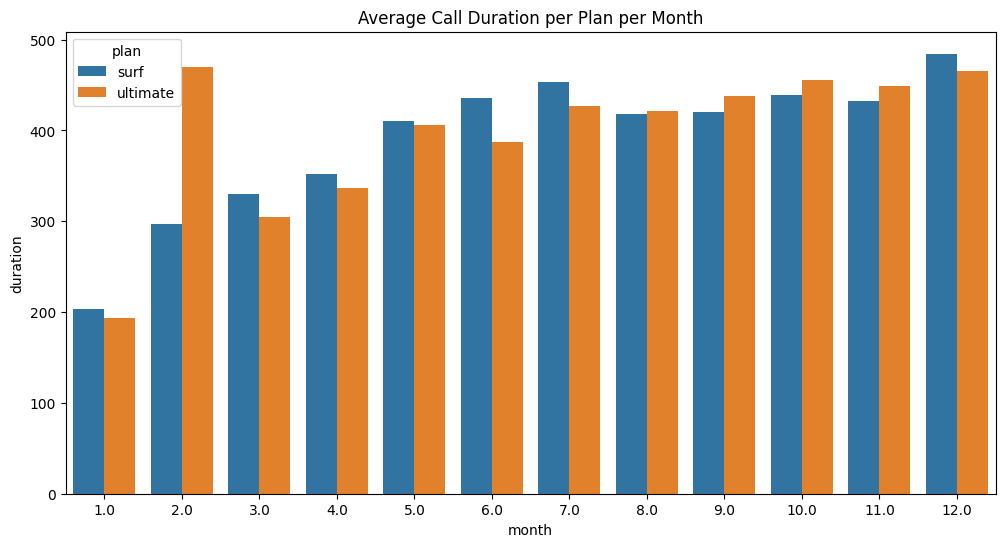

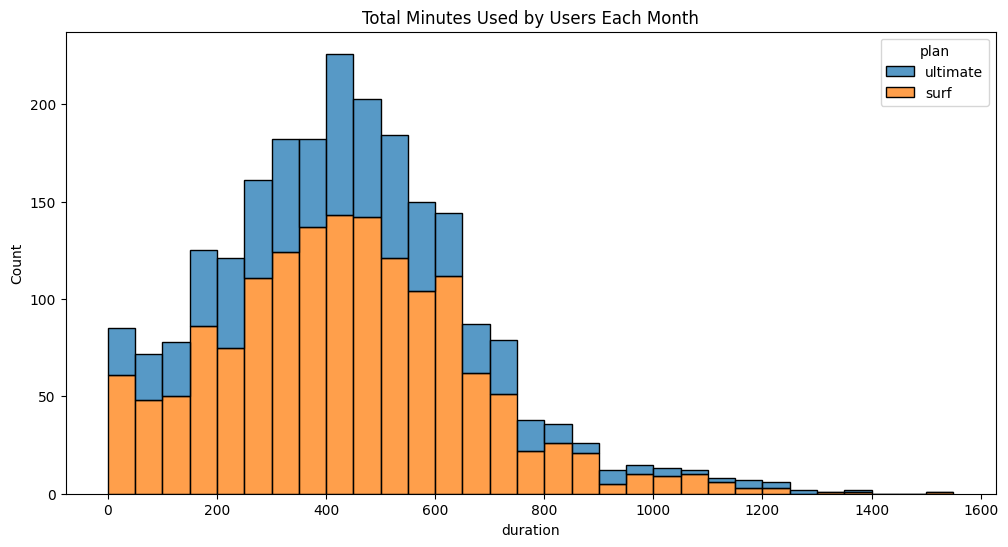

       plan        mean           var
0      surf  436.519741  52571.063243
1  ultimate  434.676017  56573.632247


In [50]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plat to visualize it.

# Calculate average duration per plan per month
avg_duration = merged_data.groupby(['month', 'plan'])['duration'].mean().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_duration, x='month', y='duration', hue='plan')
plt.title('Average Call Duration per Plan per Month')
# Plot histogram
plt.figure(figsize=(12, 6))
sns.histplot(data=merged_data, x='duration', hue='plan', multiple='stack', binwidth=50)
plt.title('Total Minutes Used by Users Each Month')
plt.show()
# Calculate mean and variance
stats = merged_data.groupby('plan')['duration'].agg(['mean', 'var']).reset_index()
print(stats)

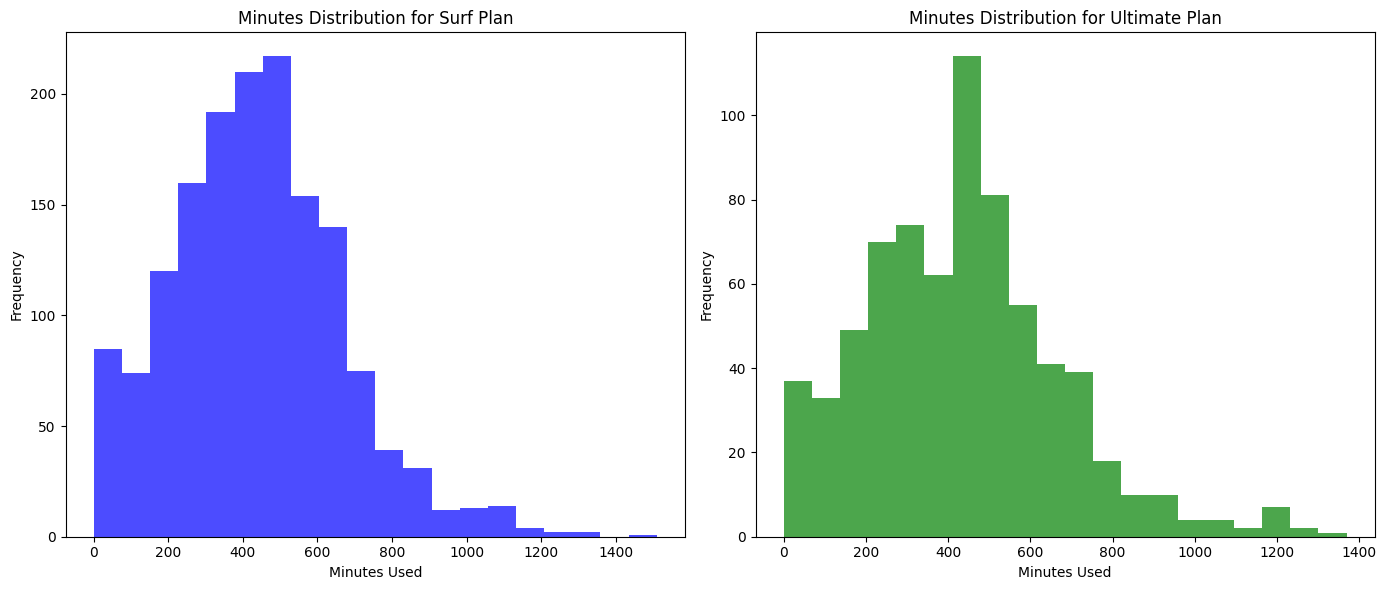

In [51]:
# Compare the number of minutes users of each plan require each month. Plot a histogram.

# Filter data for each plan
surf_data = merged_data[merged_data['plan'] == 'surf']
ultimate_data = merged_data[merged_data['plan'] == 'ultimate']

# Plotting
plt.figure(figsize=(14, 6))

# Surf Plan
plt.subplot(1, 2, 1)
plt.hist(surf_data['duration'], bins=20, color='blue', alpha=0.7)
plt.title('Minutes Distribution for Surf Plan')
plt.xlabel('Minutes Used')
plt.ylabel('Frequency')

# Ultimate Plan
plt.subplot(1, 2, 2)
plt.hist(ultimate_data['duration'], bins=20, color='green', alpha=0.7)
plt.title('Minutes Distribution for Ultimate Plan')
plt.xlabel('Minutes Used')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [52]:
# Calculate the mean and the variance of the monthly call duration

call_stats = merged_data.groupby(['plan', 'month'])['duration'].agg(['mean', 'var']).reset_index()
call_stats.head()


,plan,month,mean,var
0,surf,1.0,203.00,15842.000000
1,surf,2.0,297.00,52226.500000
2,surf,3.0,330.00,35809.363636
3,surf,4.0,351.54,50866.743265
4,surf,5.0,410.24,56938.779459


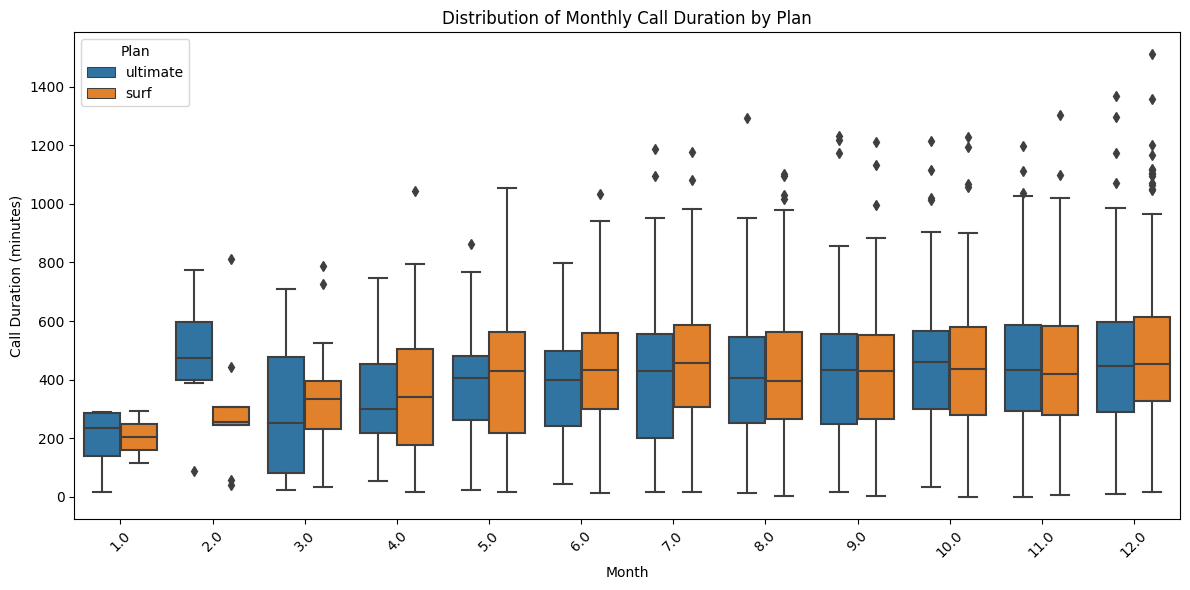

In [53]:
# Plot a boxplot to visualize the distribution of the monthly call duration


# Set the size of the plot
plt.figure(figsize=(12, 6))

# Create a boxplot for the monthly call duration
sns.boxplot(data=merged_data, x='month', y='duration', hue='plan')

# Add a title and labels
plt.title('Distribution of Monthly Call Duration by Plan')
plt.xlabel('Month')
plt.ylabel('Call Duration (minutes)')
plt.xticks(rotation=45)  # Rotate month labels for better readability
plt.legend(title='Plan')

# Display the plot
plt.tight_layout()
plt.show()


Conclusion:I can see that Surf plan users have shorter calls on average while Ultimate plan users show a wider variability in call duration. The Surf plan users have a more consistent call duration pattern. All this being said this is more than likely due to the limitaions of the Surf plan making their users more cautios versus the Ultimate plan users who have a lot more minutes, sometimes even unlimited, making them a lot more flexible in how they use their call allowance. There are other factors to consider as well though that there are other things that could influenence call behavior too like holidays/the time of year, for example.

### Messages

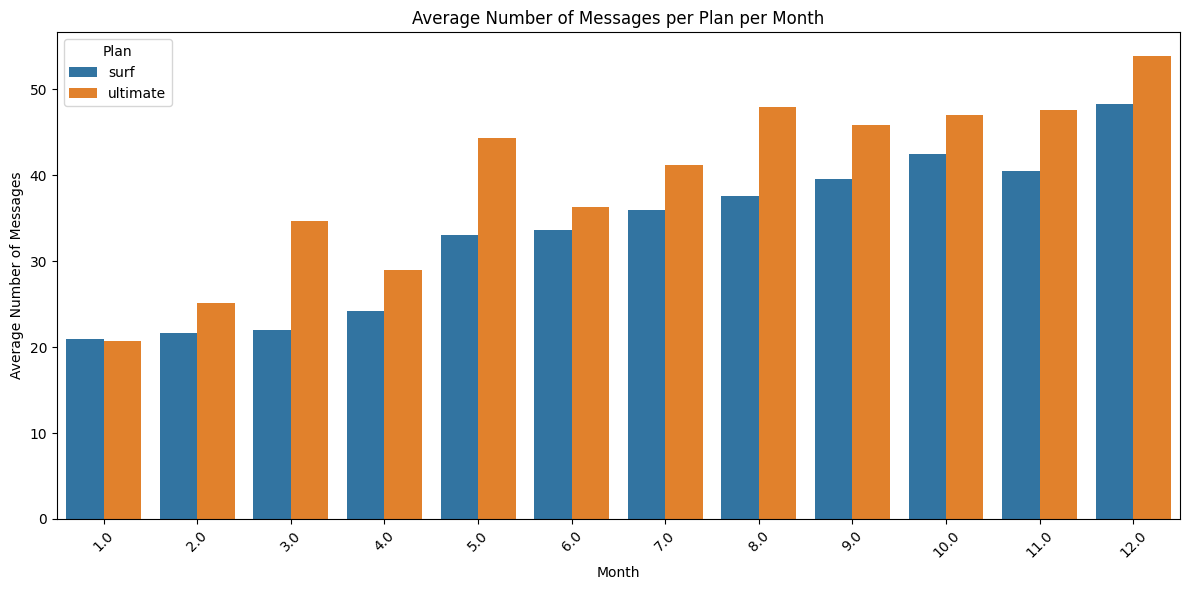

In [54]:
# Compare the number of messages users of each plan tend to send each month

# Calculate the average number of messages sent per plan per month
avg_messages = merged_data.groupby(['plan', 'month'])['messages_count'].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 6))

# Create a bar plot
sns.barplot(data=avg_messages, x='month', y='messages_count', hue='plan')

# Add a title and labels
plt.title('Average Number of Messages per Plan per Month')
plt.xlabel('Month')
plt.ylabel('Average Number of Messages')
plt.xticks(rotation=45)  
plt.legend(title='Plan')

# Display the plot
plt.tight_layout()
plt.show()

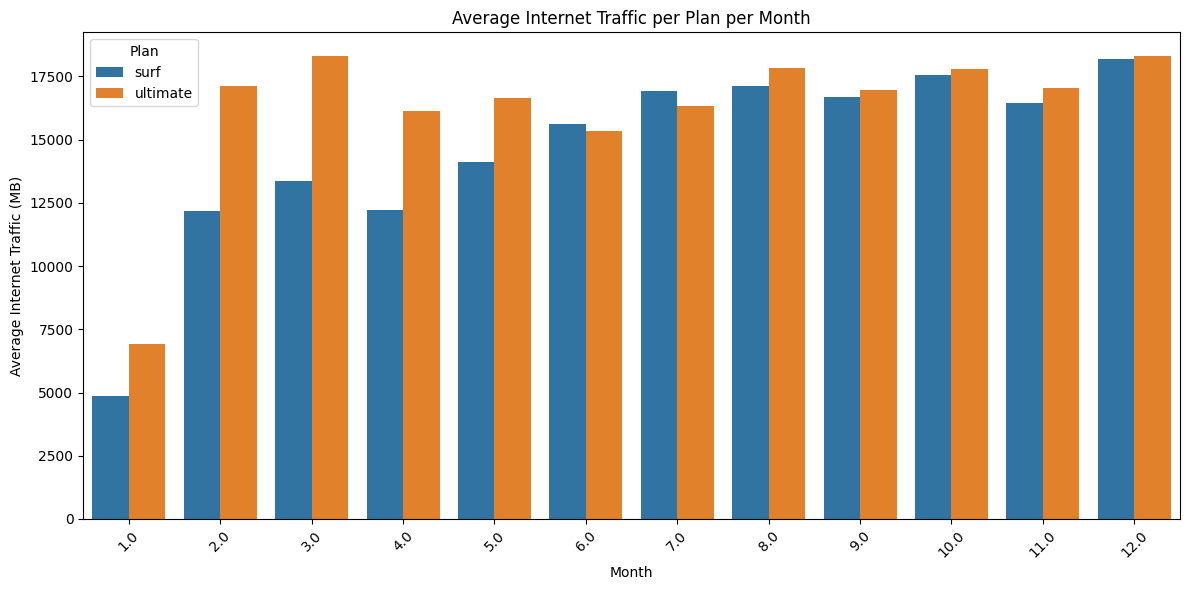

In [55]:
# Compare the amount of internet traffic consumed by users per plan

# Calculate the average internet traffic consumed per plan per month
avg_internet_usage = merged_data.groupby(['plan', 'month'])['mb_used'].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 6))

# Create a bar plot
sns.barplot(data=avg_internet_usage, x='month', y='mb_used', hue='plan')

# Add a title and labels
plt.title('Average Internet Traffic per Plan per Month')
plt.xlabel('Month')
plt.ylabel('Average Internet Traffic (MB)')
plt.xticks(rotation=45)  
plt.legend(title='Plan')

# Display the plot
plt.tight_layout()
plt.show()

In [56]:
# Group by plan and calculate descriptive statistics for monthly revenue
revenue_stats = merged_data.groupby('plan')['revenue'].agg(['mean', 'median', 'var', 'std', 'min', 'max']).reset_index()

print(revenue_stats)

       plan        mean  median          var        std    min     max
0      surf  202.083381  205.42  6242.879498  79.011895  30.33  756.87
1  ultimate  196.295561  193.16  2824.711759  53.148017  77.01  393.12


Conclusion:According to the bar chart it would suggest that the Ulimate plan users would tend to consistently send more messages. If variability is high for the Surf plan, revenue might depend significantly on how often users exceed limits. Plans with a higher max may have users who regularly exceed plan limits.

### Internet

In [57]:
megaline_internet['session_date'] = pd.to_datetime(megaline_internet['session_date'])
megaline_internet['month'] = megaline_internet['session_date'].dt.month

monthly_usage = megaline_internet.groupby(['user_id', 'month'])['mb_used'].sum().reset_index()

monthly_usage = monthly_usage.merge(megaline_users[['user_id', 'plan']], on='user_id')
pivot_table = monthly_usage.pivot_table(index='month', columns='plan', values='mb_used', aggfunc='mean')
print(pivot_table)

plan           surf      ultimate
month                            
1       4874.860000   6918.092500
2      12178.843333  17128.808571
3      13345.440000  18321.518333
4      12228.778571  16121.654762
5      14119.728026  16624.482414
6      15623.666632  15337.921064
7      16923.463917  16344.744407
8      17112.224403  17814.720141
9      16677.397254  16969.869535
10     17533.275256  17780.292000
11     16455.548043  17033.685354
12     18189.669590  18323.191854


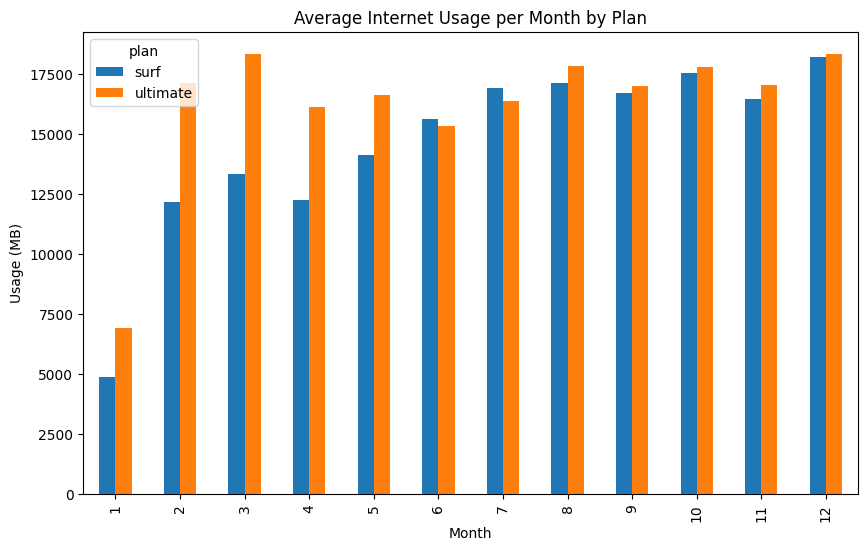

In [58]:
pivot_table.plot(kind='bar', figsize=(10, 6))
plt.title('Average Internet Usage per Month by Plan')
plt.xlabel('Month')
plt.ylabel('Usage (MB)')
plt.show()

In [59]:
descriptive_stats = monthly_usage.groupby('plan')['mb_used'].describe()
print(descriptive_stats)

           count          mean          std     min        25%       50%  \
plan                                                                       
surf      1558.0  16717.702137  7884.682983   92.31  12187.955  16923.83   
ultimate   719.0  17238.642253  7831.018323  233.17  12671.130  16863.45   

                75%       max  
plan                           
surf      21039.860  70931.59  
ultimate  21025.155  46595.33  


Conclusion:Based on the bar chart, there seems to be a slight increase in internet usage from month to month for both plan types. This might indicate that users data needs increasing over time. The bar chart also shows that the users on the Ultimate plan consume more internet traffic compared to users on the Surf plan, showing a significant difference in their average monthly usage. The descriptive statistics show a higher mean and wider range of usage for the Ultimate plan in comparison to the Surf plan. Surf plan users likely have more limited usage and are probably using the internet for more basic tasks. Overall:User behavior is definitely different between plans. Users on the Ultimate plan utilize the internet more heavily, probably with a higher data allowance and a higher speed. Surf plan users likely manage their data usage more carefully. The plans probably cater to these different usage patterns specifically.

## Revenue

In [60]:
# Group by plan and calculate descriptive statistics for monthly revenue
revenue_stats = merged_data.groupby('plan')['revenue'].agg(['mean', 'median', 'var', 'std', 'min', 'max']).reset_index()

print(revenue_stats)

       plan        mean  median          var        std    min     max
0      surf  202.083381  205.42  6242.879498  79.011895  30.33  756.87
1  ultimate  196.295561  193.16  2824.711759  53.148017  77.01  393.12


Conclusions: The higher mean and median on the surf plan compared to the ultimate plan suggests that the users on the surf plan would generate more revenue, most likely due to exceeding limitations set on their plan. Users on the ultimate plan generally stay within or slightly above their limitations, this leads to a more stable but lower per-user revenue. The high variance and standard deviation indicates that there's a wide range in how much users exceed their limits on their plans, which could lead to inconsistent revenue streams. The low variance and standard deviation of the ultimate plan shows more consistent user spending. The different revenue ranges also show that in the surf some users are consistently exceeding their limits and the ultimate range shows that most users have the same usage patterns. Overall thoughts: The Ultimate Plan defintely provides more predictable revenue streams even though it potentially will bring in lower revenue. The Surf Plan may bring in the most revenue but at the same time it might not because it's an unpredictable revenue stream. 

## Test statistical hypotheses

[Test the hypothesis that the average revenue from users of the Ultimate and Surf calling plans differs.]

[Formulate the null and the alternative hypotheses, choose the statistical test, decide on the alpha value.]

In [61]:
surf_users = merged_data[merged_data['plan'] == 'surf']
ultimate_users = merged_data[merged_data['plan'] == 'ultimate']
surf_users.shape, ultimate_users.shape

((1579, 8), (724, 8))

$H0$: The mean of ....Null Hypothesis (H₀): The average revenue is the same for both plans.

$H1$: The mean of ...Alternative Hypothesis (H₁): The average revenue differs between the plans.

In [62]:
#Had to deal with missing values because I kept getting NaN p-value for an answer.
surf_revenue = surf_users['revenue'].dropna()
ultimate_revenue = ultimate_users['revenue'].dropna()
t_stat, p_value = st.ttest_ind(surf_revenue, ultimate_revenue, equal_var=False)

alpha = 0.05

# Print results and interpret
print('p-value:', p_value)
if p_value < alpha:
    print('We reject the null hypothesis')
else:
    print("We can't reject the null hypothesis")


p-value: 0.06971484057996873
We can't reject the null hypothesis


[Test the hypothesis that the average revenue from users in the NY-NJ area is different from that of the users from the other regions.]

[Formulate the null and the alternative hypotheses, choose the statistical test, decide on the alpha value.]

In [63]:
# Merge the city information into merged_data
merged_data = merged_data.merge(megaline_users[['user_id', 'city']], on='user_id', how='left')

# Verify that the city was added
print(merged_data.head())


   user_id  month  calls_count  duration  messages_count   mb_used      plan  \
0     1000   12.0         16.0     124.0            11.0   1901.47  ultimate   
1     1001    8.0         27.0     182.0            30.0   6919.15      surf   
2     1001    9.0         49.0     315.0            44.0  13314.82      surf   
3     1001   10.0         65.0     393.0            53.0  22330.49      surf   
4     1001   11.0         64.0     426.0            36.0  18504.30      surf   

   revenue                               city  
0    85.35  Atlanta-Sandy Springs-Roswell, GA  
1    96.36        Seattle-Tacoma-Bellevue, WA  
2   170.77        Seattle-Tacoma-Bellevue, WA  
3   253.38        Seattle-Tacoma-Bellevue, WA  
4   223.86        Seattle-Tacoma-Bellevue, WA  


In [64]:
# Check for missing values
print(merged_data.isnull().sum())

# Check for infinite values
print(np.isinf(merged_data['revenue']).any())

user_id             0
month              10
calls_count        45
duration           45
messages_count    497
mb_used            26
plan                0
revenue           544
city                0
dtype: int64
False


In [65]:
# Filter revenue data by region
ny_nj_revenue = merged_data[merged_data['city'].str.contains('NY|NJ')]['revenue']
others_revenue = merged_data[~merged_data['city'].str.contains('NY|NJ')]['revenue']

# Perform t-test
t_stat, p_value = st.ttest_ind(ny_nj_revenue, others_revenue, nan_policy='omit')

print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Interpret the result
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in average revenue.")
else:
    print("Fail to reject the null hypothesis: No significant difference in average revenue.")

T-statistic: 0.733268593538492, P-value: 0.4634924475864478
Fail to reject the null hypothesis: No significant difference in average revenue.


## General conclusion


End Conclusion: After analyzing the revenue data, it shows that there is a significant difference between the Ultimate and Surf plans. When comparing the revenue, mean, median, variance, and standard deviation these are some of the main findings: The Ultimate plan is more stable, has consistent and predictable revenue streams, but generates less revenue, and the users rarely exceed their limitations. The Surf plan is highly unpredictable, produces a much higher revenue stream, but that revenue is inconsistent, and the users consistently exceed their limits. In our hypothesis testing we could not disprove the theory that revenue from users in the NY-NJ area is different from other regions. The other hypothesis we tested was if the average revenue from users of Ultimate and Surf plans differs and based on that test there isn't enough evidence to say that the null hypothesis is false. Overall, the Surf plan defintely brings in more revenue, however it is very inconsistent and there is always a chance that you might not make any where near what you think you will.

